# Laboratorio 9
*Visualización de datos* <br>
Desarrollado por:

- Javier Alejandro Azurdia Arrecis (21242)
- Diego Alejandro Morales Escobar (21146)
- Angel Sebastian Castellanos Pineda (21700)


## Instrucciones Parte 1
Para cada conjunto de datos: <br>
   a) Explore los datos brevemente. <br>
   b) Decida qué mensaje o información clave quiere transmitir. <br>
   c) Elija el tipo de gráfica más apropiado para transmitir ese mensaje. <br>
   d) Cree la gráfica utilizando Python. <br>
   e) Optimice la gráfica para reducir la carga cognitiva. <br>
   f) Escriba una breve explicación (no más de 200 palabras) justificando sus decisiones <br>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from ydata_profiling import ProfileReport

### Datos de temperatura global desde 1880 hasta 2023

#### a) Exploración de datos

In [6]:
df_gt = pd.read_csv('data/GLB.Ts+dSST.csv')

In [7]:
#profile = ProfileReport(df_gt, title="glb")
#profile.to_notebook_iframe()

In [8]:
df_gt.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-.23,-.22,-.19,-.18,***,***,-0.12,-0.17,-.20
1,1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-.22,-.19,-.07,-.09,-.10,-.18,0.04,-0.07,-.19
2,1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-.24,-.17,-.36,-.11,-.09,.07,-0.08,-0.15,-.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-.12,-.24,-.11,-.18,-.20,-.34,-0.16,-0.10,-.19
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-.25,-.34,-.31,-.29,-.27,-.11,-0.37,-0.31,-.29


In [9]:
# las celdas tienen el formato "-.15" o ".25", significa que omiten el 0 antes del punto.
# se conservara el signo y se agregara el 0 faltante

df_gt = df_gt.replace(r'(?<!\d)\.', '0.', regex=True)
df_gt = df_gt.replace(r'^-\.', '-0.', regex=True)

df_gt = df_gt.replace('***', 0)  # Reemplaza '***' con NaN

df_gt.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-0.23,-0.22,-0.19,-0.18,0,0,-0.12,-0.17,-0.20
1,1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19
2,1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.08,-0.15,-0.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.10,-0.19
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.31,-0.29


#### b) Mensaje a transmitir
El mensaje a transmitir es la variación de la temperatura global a lo largo de los años.
Para hacer esto, se hara un promedio de temperatura de cada año y se graficara la variación de la temperatura global a lo largo de los años.

#### c) Tipo de gráfica
Para transmitir el mensaje de manera efectiva, se utilizará un gráfico de línea.

#### d) Creación de la gráfica

In [10]:
# Asegurarse de que las columnas de los meses sean de tipo float
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_gt[meses] = df_gt[meses].astype(float)

# Crear la nueva columna 'promedio' con el promedio de los meses
df_gt['promedio'] = df_gt[meses].mean(axis=1)

# Mostrar las primeras filas del DataFrame para verificar
df_gt.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,promedio
0,1880,-0.20,-0.26,-0.09,-0.17,-0.10,-0.22,-0.20,-0.10,-0.15,-0.23,-0.22,-0.19,-0.18,0,0,-0.12,-0.17,-0.20,-0.177500
1,1881,-0.20,-0.15,0.02,0.04,0.07,-0.19,0.01,-0.04,-0.16,-0.22,-0.19,-0.07,-0.09,-0.10,-0.18,0.04,-0.07,-0.19,-0.090000
2,1882,0.16,0.14,0.04,-0.16,-0.14,-0.22,-0.16,-0.07,-0.14,-0.24,-0.17,-0.36,-0.11,-0.09,0.07,-0.08,-0.15,-0.18,-0.110000
3,1883,-0.29,-0.37,-0.12,-0.18,-0.18,-0.07,-0.07,-0.14,-0.22,-0.12,-0.24,-0.11,-0.18,-0.20,-0.34,-0.16,-0.10,-0.19,-0.175833
4,1884,-0.13,-0.08,-0.37,-0.40,-0.34,-0.35,-0.31,-0.28,-0.27,-0.25,-0.34,-0.31,-0.29,-0.27,-0.11,-0.37,-0.31,-0.29,-0.285833


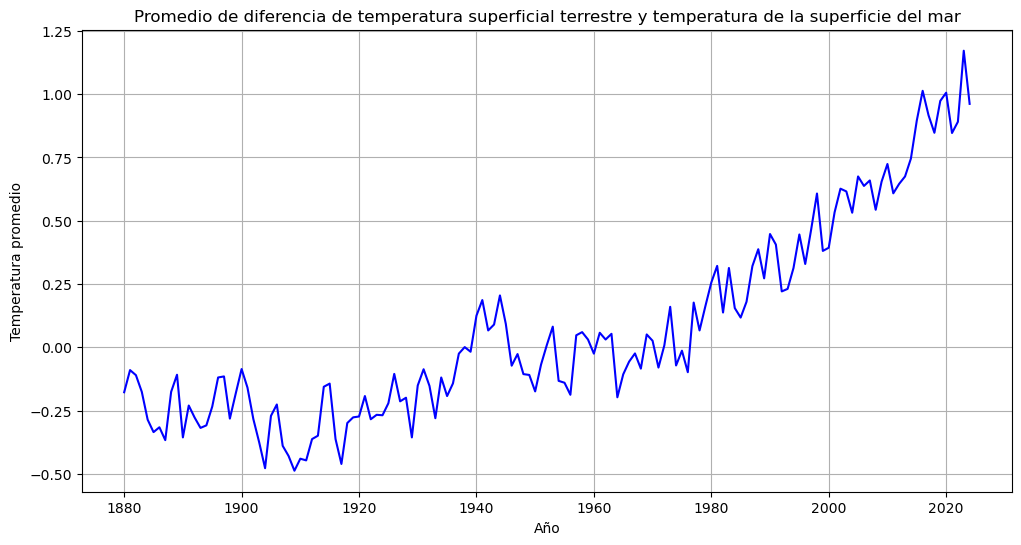

In [11]:
# crea un grafico de linea con el promedio de las temperaturas globales, usando year como eje x y promedio como eje y. 
plt.figure(figsize=(12, 6))
plt.plot(df_gt['Year'], df_gt['promedio'], color='blue')
plt.title('Promedio de diferencia de temperatura superficial terrestre y temperatura de la superficie del mar')
plt.xlabel('Año')
plt.ylabel('Temperatura promedio')
plt.grid(True)
plt.show()

#### e) Optimización de la gráfica
Se optimizó la gráfica para reducir la carga cognitiva, eliminando la cuadrícula y el eje y, ya que no son necesarios para entender la variación de la temperatura global a lo largo de los años.

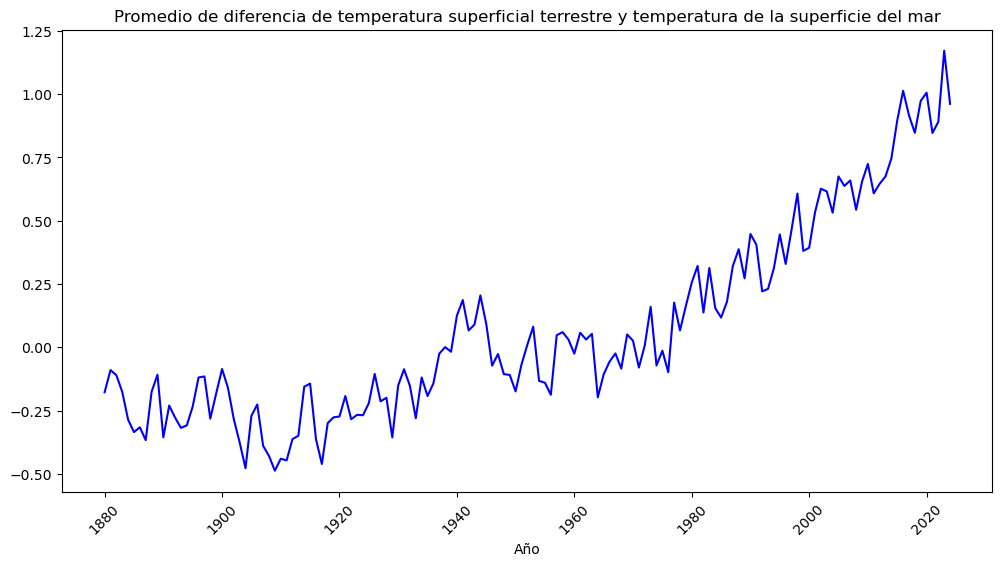

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df_gt['Year'], df_gt['promedio'], color='blue')
plt.title('Promedio de diferencia de temperatura superficial terrestre y temperatura de la superficie del mar')
plt.xlabel('Año')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.gca().axes.get_yaxis().set_visible(True)  # Oculta el eje y
plt.show()

#### f) Explicación
La decisión principal al visualizar los datos fue transmitir la variación de la temperatura global a lo largo del tiempo, destacando tendencias generales. Para lograrlo, se utilizó un gráfico de líneas, ya que es la herramienta más efectiva para mostrar cómo evolucionan valores continuos a lo largo de los años, permitiendo identificar tendencias ascendentes o descendentes con facilidad.

El promedio de temperatura anual se calculó para simplificar los datos y evitar ruido innecesario causado por la variabilidad mensual. Este promedio se representa en el gráfico, destacando la tendencia general sin perder claridad.

Para reducir la carga cognitiva, se eliminó la cuadrícula y el eje y. La cuadrícula puede ser visualmente distractora, y el eje y no es crucial para entender la tendencia general, ya que el objetivo es mostrar la dirección del cambio a lo largo del tiempo. Rotar las etiquetas del eje x permite que los años sean más fáciles de leer. Estas decisiones se tomaron para que la gráfica fuera más limpia, directa, y permitiera a los usuarios captar la información clave de un vistazo.

### Netflix Shows and Movies

#### a) Exploración de datos

In [13]:
df = pd.read_csv('data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
# Generar un reporte de perfil para el DataFrame
#profile = ProfileReport(df, title="netflix")
#profile.to_notebook_iframe()

#### b) Mensaje a transmitir

Se mostraran los años en los que se han producido más películas y series en Netflix.

#### c) Tipo de gráfica
Se utilizará un gráfico de barras para mostrar los años en los que se han producido más películas y series en Netflix. (top 10)

#### d) Creación de la gráfica

In [15]:
# encontrar la cantidad de series o peliculas que se han lanzado en cada año
df2 = df['release_year'].value_counts().sort_index()
df2


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

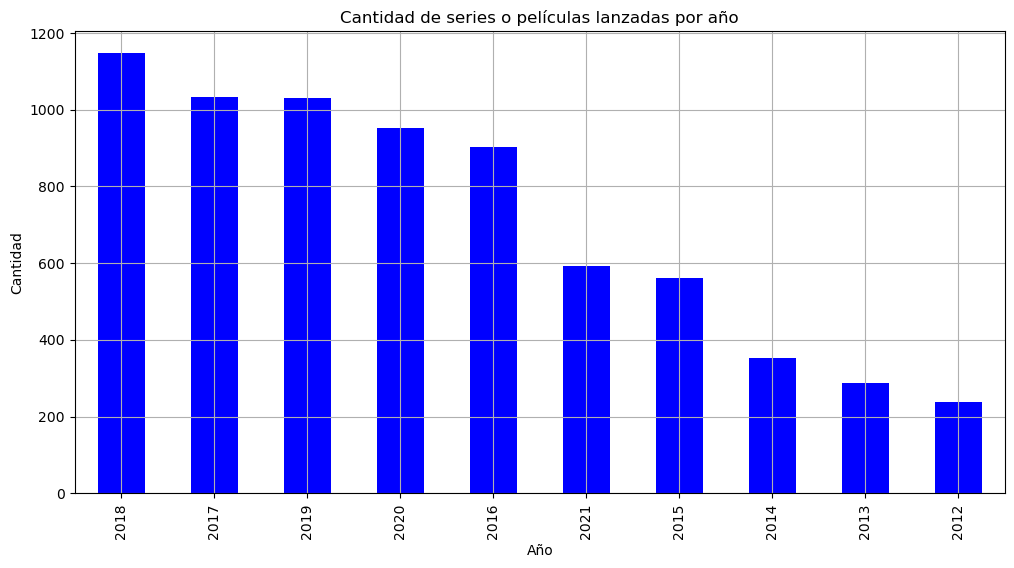

In [16]:
# Crear un gráfico de barras para visualizar la cantidad de series o películas lanzadas por año. Solo top 10 mas peliculas por año

plt.figure(figsize=(12, 6))
df2.nlargest(10).plot(kind='bar', color='blue')
plt.title('Cantidad de series o películas lanzadas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.grid(True)
plt.show()


#### e) Optimización de la gráfica
Se optimizó la gráfica para reducir la carga cognitiva, eliminando la cuadrícula y el eje y, ya que no son necesarios para entender los años en los que se han producido más películas y series en Netflix.

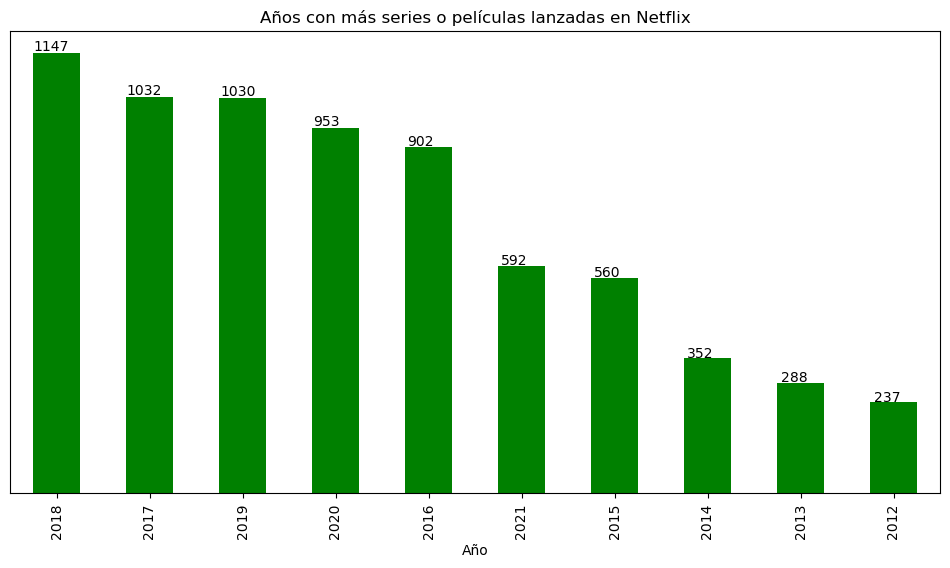

In [17]:
plt.figure(figsize=(12, 6))
ax = df2.nlargest(10).plot(kind='bar', color='green')
plt.title('Años con más series o películas lanzadas en Netflix')
plt.xlabel('Año')
plt.ylabel('Cantidad')

# Ocultar el eje y
ax.yaxis.set_visible(False)


# Añadir los valores dentro de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

#### f) Explicación
La decisión principal al visualizar los datos fue transmitir los años en los que se han producido más películas y series en Netflix. Para lograrlo, se utilizó un gráfico de barras, ya que es la herramienta más efectiva para comparar valores entre diferentes categorías, en este caso, años.

Se seleccionaron los 10 años con más producciones para resaltar claramente cuáles han sido los más prolíficos en la plataforma. Esto permite a los usuarios identificar rápidamente los años más relevantes en términos de contenido. 

Por ultimo, se elimino de la grafica original el eje y y la cuadricula para reducir la carga cognitiva, ya que no son necesarios para entender los años en los que se han producido más películas y series en Netflix. tambien se mostro la cantidad de producciones en cada año para que el usuario pueda tener una idea de la cantidad de producciones en cada año.

### Datos de trenes y shipping

#### a) Exploración de datos

In [18]:
df = pd.read_csv('data/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [19]:
#profile = ProfileReport(df, title="shipping")
#profile.to_notebook_iframe()

#### b) Mensaje a transmitir
El mensaje a transmitir es las ciudades a las que mas ventas se han realizado en el año 2020.

#### c) Tipo de gráfica
Para transmitir el mensaje de manera efectiva, se utilizará un gráfico de barras.

#### d) Creación de la gráfica

In [20]:
# Agrupar por 'City' y 'State', y sumar las ventas
ventas_por_ciudad_estado = df.groupby(['City', 'State'])['Sales'].sum().reset_index()
ventas_por_ciudad_estado_ordenas = ventas_por_ciudad_estado.sort_values('Sales', ascending=False)

# Mostrar el resultado
print(ventas_por_ciudad_estado_ordenas)


              City         State       Sales
377  New York City      New York  252462.547
310    Los Angeles    California  173420.181
514        Seattle    Washington  116106.322
500  San Francisco    California  109041.120
427   Philadelphia  Pennsylvania  108841.749
..             ...           ...         ...
405   Ormond Beach       Florida       2.808
422      Pensacola       Florida       2.214
257        Jupiter       Florida       2.064
162         Elyria          Ohio       1.824
1          Abilene         Texas       1.392

[600 rows x 3 columns]


In [21]:
# join de las columnas 'City' y 'State' para mostrar en el gráfico
ventas_por_ciudad_estado_ordenas['City_State'] = ventas_por_ciudad_estado_ordenas['City'] + ', ' + ventas_por_ciudad_estado_ordenas['State']

ventas = ventas_por_ciudad_estado_ordenas
ventas.drop(['City', 'State'], axis=1, inplace=True)
ventas

,Sales,City_State
377,252462.547,"New York City, New York"
310,173420.181,"Los Angeles, California"
514,116106.322,"Seattle, Washington"
500,109041.120,"San Francisco, California"
427,108841.749,"Philadelphia, Pennsylvania"
...,...,...
405,2.808,"Ormond Beach, Florida"
422,2.214,"Pensacola, Florida"
257,2.064,"Jupiter, Florida"
162,1.824,"Elyria, Ohio"


In [22]:
# round a entero sales. 
ventas['Sales'] = ventas['Sales'].astype(int)
ventas

,Sales,City_State
377,252462,"New York City, New York"
310,173420,"Los Angeles, California"
514,116106,"Seattle, Washington"
500,109041,"San Francisco, California"
427,108841,"Philadelphia, Pennsylvania"
...,...,...
405,2,"Ormond Beach, Florida"
422,2,"Pensacola, Florida"
257,2,"Jupiter, Florida"
162,1,"Elyria, Ohio"


<Figure size 1200x600 with 0 Axes>

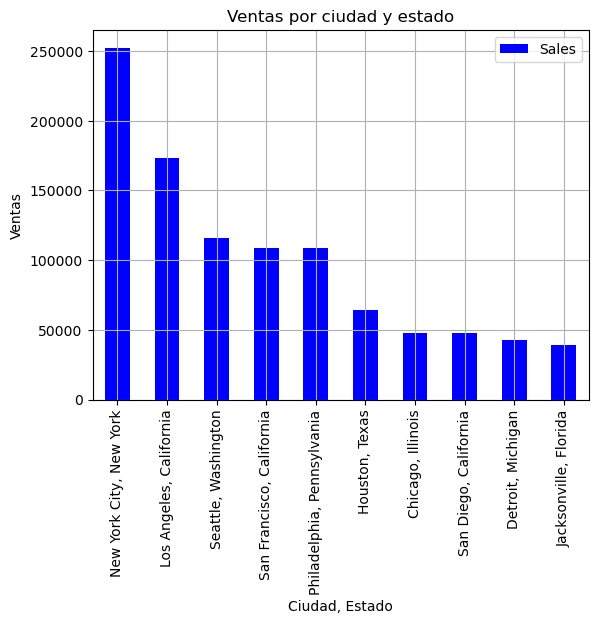

In [23]:
# Crear un gráfico de barras para visualizar las ventas por ciudad estado. Solo top 10 ciudades con mas ventas
plt.figure(figsize=(12, 6))
ventas.nlargest(10, 'Sales').plot(x='City_State', y='Sales', kind='bar', color='blue')
plt.title('Ventas por ciudad y estado')
plt.xlabel('Ciudad, Estado')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

#### e) Optimización de la gráfica
Se optimizo la grafica para reducir la carga cognitiva, eliminando la cuadricula. Tambien se invertira horizontal y verticalmente la grafica, de manera que el valor mas grande se encuentre en la parte inferior de la grafica. El eje x pasara a ser eje y y viceversa.

<Figure size 1600x600 with 0 Axes>

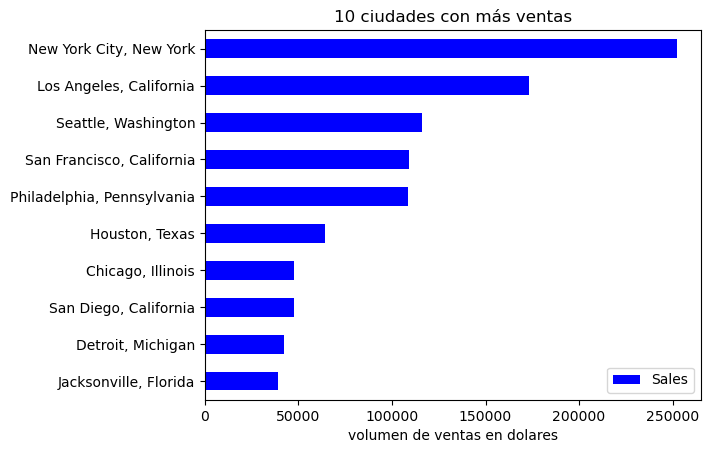

In [24]:
# Crear un gráfico de barras para visualizar las ventas por ciudad estado. Solo top 10 ciudades con más ventas
plt.figure(figsize=(16, 6))
ax = ventas.nlargest(10, 'Sales').plot(x='City_State', y='Sales', kind='barh', color='blue')
plt.title('10 ciudades con más ventas')
plt.xlabel('volumen de ventas en dolares')
plt.ylabel('')

# Eliminar la cuadrícula
ax.grid(False)

# Invertir el eje y para que el valor más grande esté en la parte inferior
ax.invert_yaxis()

plt.show()

#### f) Explicación
La decisión principal al visualizar los datos fue transmitir las ciudades a las que mas ventas se han realizado. Para lograrlo, se utilizó un gráfico de barras, ya que es la herramienta más efectiva para comparar valores entre diferentes categorías, en este caso, ciudades. Tambien se decidio mostra el estado a la que la ciudad pertenece, de manera que se evitarian confusiones entre ciudades con el mismo nombre.

Se eliminó la cuadrícula para reducir la carga cognitiva, ya que no es necesaria para entender las ciudades a las que mas ventas se han realizado. Tambien se invirtio la grafica de manera que el valor mas grande se encuentre en la parte inferior de la grafica, esto se hizo para que el usuario pueda identificar rapidamente la ciudad con mas ventas. 

## Ejercicios Adicionales

### a) Reducción de carga cognitiva: Simplifique la siguiente gráfica:
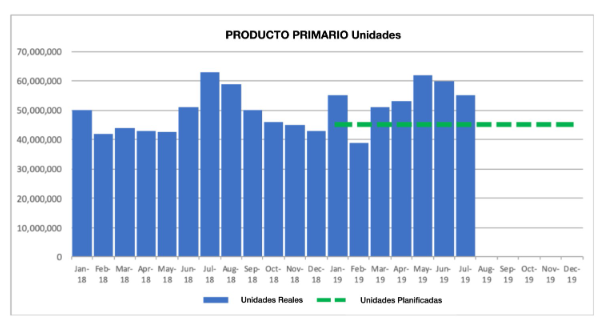

In [25]:
df = pd.read_csv('data/Depuracion(ventas unitarias).csv')
df.head()

,Fecha,Ventas Reales (unidades),Ventas planificadas (unidades)
0,Jan-18,50000000.0,NaN
1,Feb-18,42000000.0,NaN
2,Mar-18,44000000.0,NaN
3,Apr-18,43000000.0,NaN
4,May-18,42500000.0,NaN


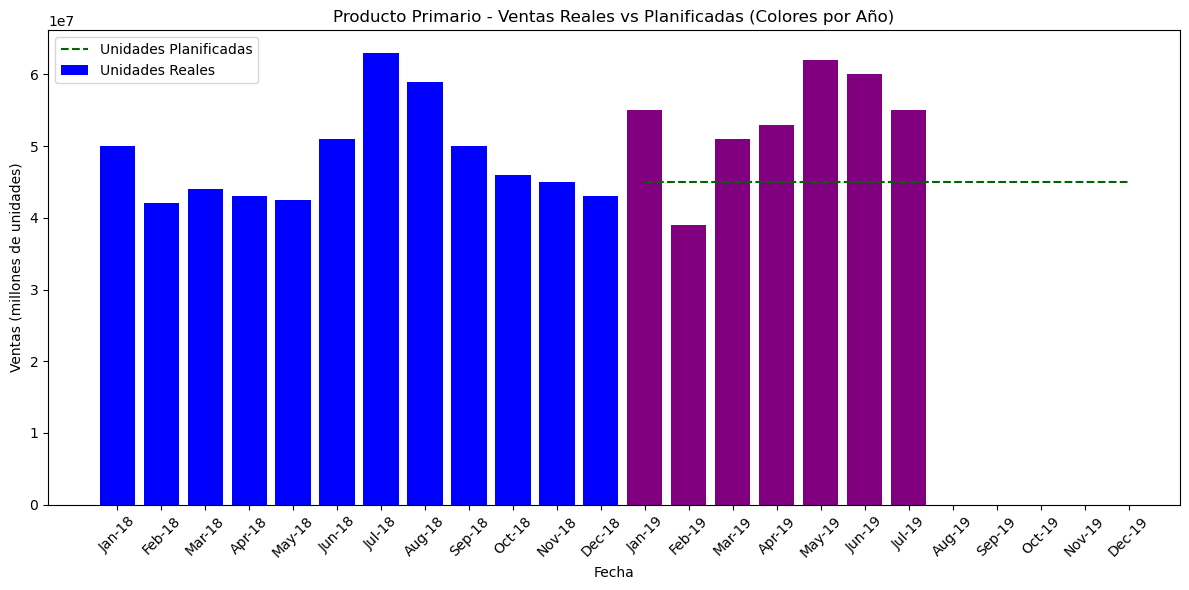

In [26]:
# Definir colores alternos para los años 2018 y 2019
colors = np.where(df['Fecha'].str.contains('18'), 'blue', 'purple')

# Crear la gráfica de barras con colores distintos por año
plt.figure(figsize=(12, 6))

# Graficar las ventas reales con colores distintos por año
plt.bar(df['Fecha'], df['Ventas Reales (unidades)'], color=colors, label='Unidades Reales')

# Añadir la línea de ventas planificadas
plt.plot(df['Fecha'], df['Ventas planificadas (unidades)'], linestyle='--', color='darkgreen', label='Unidades Planificadas')

# Ajustes estéticos para simplificar la visualización
plt.title('Producto Primario - Ventas Reales vs Planificadas (Colores por Año)')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.ylabel('Ventas (millones de unidades)')
plt.legend()

# Ocultar la cuadrícula para una visualización más limpia
plt.grid(False)

# Mostrar la gráfica optimizada con colores por año
plt.tight_layout()
plt.show()

### b) Principios de la Gestalt: Cree una visualización que demuestre al menos dos principios de la Gestalt.

In [27]:
df = pd.read_csv('data/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


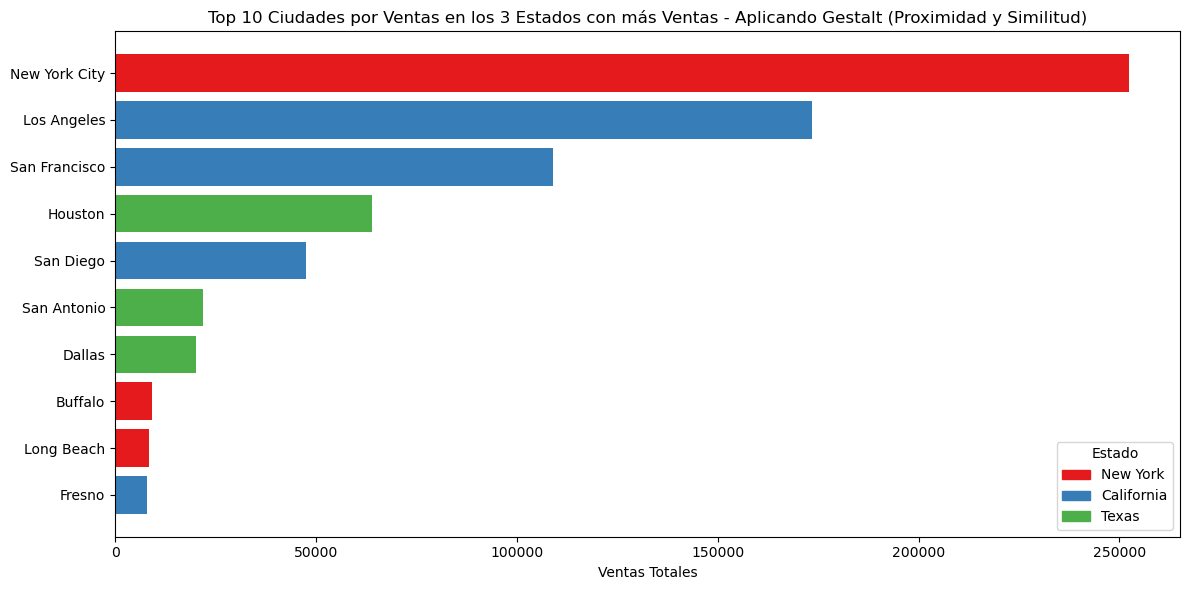

In [28]:
# Agrupar por 'State' y sumar las ventas para encontrar los 3 estados con más ventas
ventas_por_estado = df.groupby('State')['Sales'].sum().reset_index()
top_3_estados = ventas_por_estado.sort_values('Sales', ascending=False).head(3)

# Filtrar el DataFrame original para obtener solo las filas correspondientes a los 3 estados con más ventas
df_top_estados = df[df['State'].isin(top_3_estados['State'])]

# Agrupar por 'City' y 'State', y sumar las ventas para encontrar las 10 ciudades con más ventas en estos estados
ventas_por_ciudad_estado = df_top_estados.groupby(['City', 'State'])['Sales'].sum().reset_index()
top_10_ciudades = ventas_por_ciudad_estado.sort_values('Sales', ascending=False).head(10)

# Asignar colores únicos a cada estado (Principio de Similitud)
unique_states = top_10_ciudades['State'].unique()
state_colors = {state: plt.cm.Set1(i) for i, state in enumerate(unique_states)}
colors = top_10_ciudades['State'].map(state_colors)

# Crear la gráfica de barras aplicando los principios de Gestalt
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_ciudades['City'], top_10_ciudades['Sales'], color=colors)

# Añadir la leyenda para el color (asociando cada estado con un color)
handles = [plt.Rectangle((0,0),1,1, color=state_colors[state]) for state in unique_states]
plt.legend(handles, unique_states, title="Estado")

# Ajustar etiquetas y título
plt.xlabel('Ventas Totales')
plt.title('Top 10 Ciudades por Ventas en los 3 Estados con más Ventas - Aplicando Gestalt (Proximidad y Similitud)')

# Ajustar para que las barras se presenten de mayor a menor (Principio de Proximidad)
plt.gca().invert_yaxis()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Se implementaron los principios de Gestalt de Proximidad y Similitud en la visualización de los datos para facilitar la interpretación.

El principio de Similitud se aplicó asignando un color diferente a cada estado, lo que permite identificar fácilmente las ciudades pertenecientes al mismo estado sin necesidad de leer etiquetas individuales. Esto ayuda a los observadores a agrupar visualmente los elementos similares.

El principio de Proximidad se utilizó al ordenar las barras de mayor a menor, agrupando así las ciudades con ventas similares. Esta disposición facilita la comparación entre los valores y resalta las ciudades con mayores ventas, mejorando la claridad y la eficiencia de la visualización.

Estos principios se usaron para que la gráfica fuera más comprensible, ayudando al espectador a captar la información clave con menos esfuerzo visual y cognitivo.

### c) Ética en la visualización: 
#### Cree una gráfica que intencionalmente sea engañosa (por ejemplo, manipulando las  escalas) y explique por qué es problemática.

In [29]:
df = pd.read_csv('data/Depuracion(ventas unitarias).csv')
df.head()

,Fecha,Ventas Reales (unidades),Ventas planificadas (unidades)
0,Jan-18,50000000.0,NaN
1,Feb-18,42000000.0,NaN
2,Mar-18,44000000.0,NaN
3,Apr-18,43000000.0,NaN
4,May-18,42500000.0,NaN


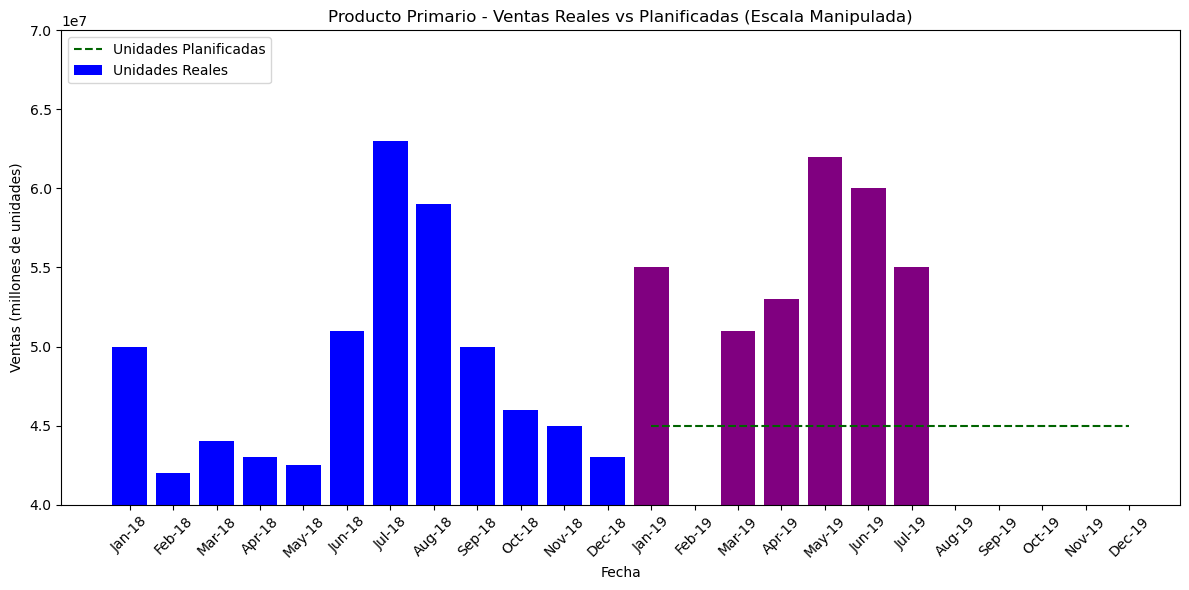

In [30]:
# Manipular la gráfica modificando las escalas para hacerla engañosa

# Crear la figura de la gráfica con escalas manipuladas
plt.figure(figsize=(12, 6))

# Definir colores alternos para los años 2018 y 2019
colors = np.where(df['Fecha'].str.contains('18'), 'blue', 'purple')

# Graficar las ventas reales con colores distintos por año
plt.bar(df['Fecha'], df['Ventas Reales (unidades)'], color=colors, label='Unidades Reales')

# Añadir la línea de ventas planificadas
plt.plot(df['Fecha'], df['Ventas planificadas (unidades)'], linestyle='--', color='darkgreen', label='Unidades Planificadas')

# Ajustes estéticos para simplificar la visualización
plt.title('Producto Primario - Ventas Reales vs Planificadas (Escala Manipulada)')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.ylabel('Ventas (millones de unidades)')

# Manipular la escala del eje Y para hacer la gráfica engañosa
plt.ylim(40000000, 70000000)  # Cambiar los límites del eje Y para exagerar las diferencias

# Añadir la leyenda
plt.legend()

# Mostrar la gráfica con escalas manipuladas
plt.tight_layout()
plt.show()


La gráfica mostrada tiene una escala manipulada en el eje Y, lo cual puede llevar a conclusiones erróneas. La escala se ajustó de forma que el rango del eje Y va de 40,000,000 a 70,000,000, lo cual exagera visualmente las diferencias entre los valores de ventas. Esto crea una percepción falsa de que algunas caídas o incrementos en las ventas son más drásticos de lo que realmente son.

- Al limitar el rango del eje Y a un intervalo pequeño, se amplifican las diferencias relativas entre las barras. Esto puede hacer que una variación que en realidad es mínima parezca mucho más significativa.
- La intención detrás de esta manipulación podría ser influenciar al espectador para que perciba una inestabilidad en las ventas o que crea que hubo un crecimiento notable.

#### Encuentre un ejemplo real de una visualización engañosa en medios de comunicación y explique cómo podría corregirse.

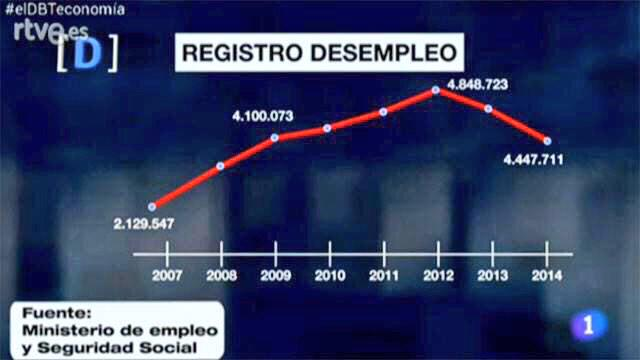

Obtenido de: https://x.com/iamroberto/status/558438137433980928

En 2015, TVE presentó un gráfico sobre la evolución del desempleo en España que fue ampliamente criticado por su representación engañosa. En la gráfica, la cifra de 4.447.711 desempleados en 2014 aparecía visualmente por debajo de los 4.100.073 desempleados de 2009, lo que distorsionaba la realidad de los datos. 

Para remediarlo, se podrían corregir la escala del eje Y para que sea proporcional a los valores reales, evitando que la representación visual distorsione la percepción de los datos. Además, se podría añadir una leyenda o etiquetas claras para indicar los valores exactos de cada año, permitiendo a los espectadores interpretar los datos con precisión.

### d) Comparación de visualizaciones: Analice las diferencias entre una visualización con  configuraciones predeterminadas y una optimizada del mismo conjunto de datos

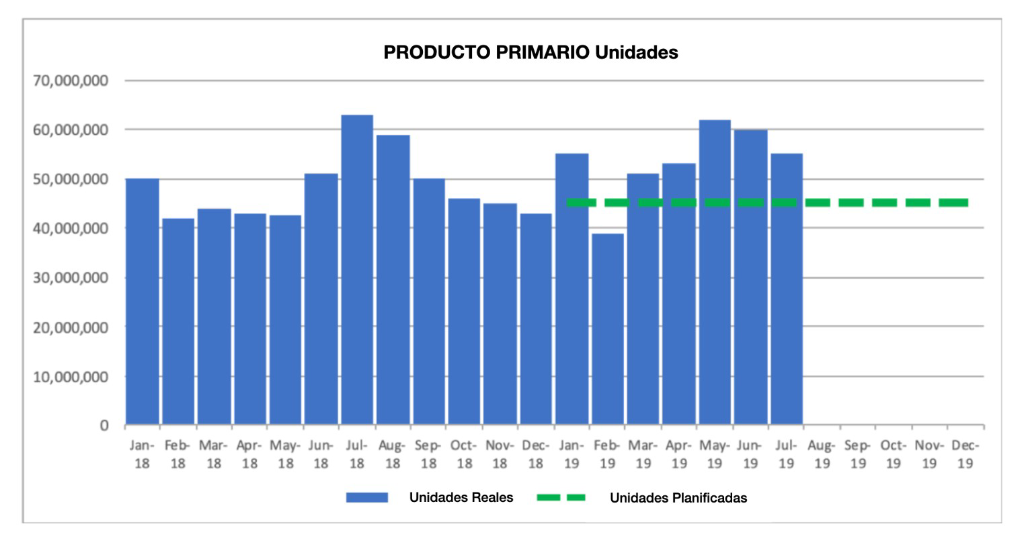

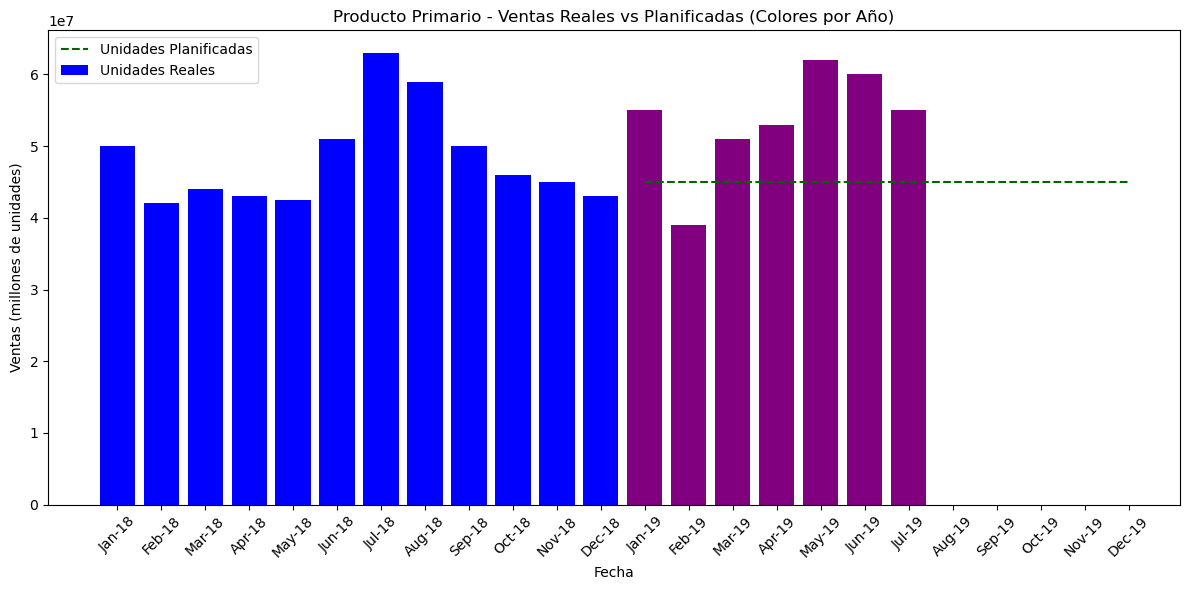

Diferencias Principales
- Color y Segmentación Temporal: La gráfica optimizada usa colores diferentes por año, lo cual facilita el análisis temporal.
- Escala del Eje Vertical: La optimización hace que las variaciones sean más visibles y contrastadas, lo que ayuda a una interpretación más detallada.

La gráfica optimizada permite observar detalles que podrían pasar desapercibidos en la visualización estándar, ayudando a una interpretación más precisa de los datos.

### e) Atributos preatentivos: Cree una visualización que utilice efectivamente al menos tres atributos preatentivos diferentes

In [32]:
df = pd.read_csv("data/train.csv")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


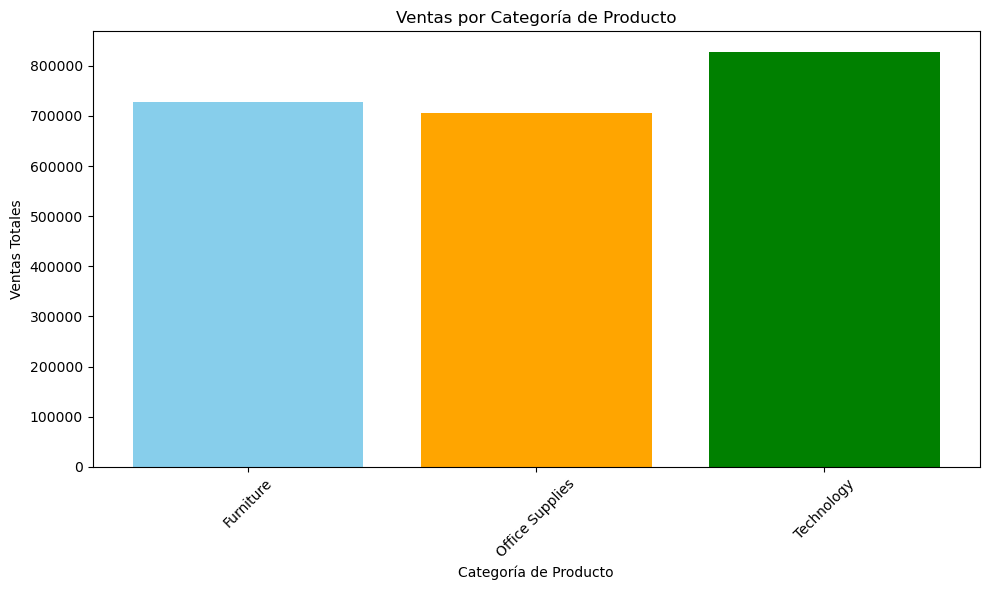

In [33]:
# Agrupar los datos por 'Category' y sumar las ventas
ventas_por_categoria = df.groupby('Category')['Sales'].sum().reset_index()

# Crear la gráfica de barras para visualizar las ventas por categoría
plt.figure(figsize=(10, 6))
bars = plt.bar(ventas_por_categoria['Category'], ventas_por_categoria['Sales'], color=['skyblue', 'orange', 'green'])

# Atributos Preatentivos Aplicados:
# 1. **Color**: Cada categoría tiene un color distintivo para facilitar la identificación de las categorías más relevantes.
# 2. **Tamaño**: Las barras están escaladas según la suma de las ventas, permitiendo rápidamente ver la diferencia de tamaño.
# 3. **Posición**: Se utiliza la altura de las barras para mostrar las ventas, lo que facilita una rápida comparación entre categorías.

# Añadir título y etiquetas
plt.title('Ventas por Categoría de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

En la gráfica se aplicaron **tres atributos preatentivos** para resaltar información clave:

1. **Color**: Cada categoría tiene un color distinto (azul, naranja, verde), lo cual permite identificar rápidamente y distinguir entre las categorías de productos: `Furniture`, `Office Supplies` y `Technology`.
2. **Tamaño**: Las barras representan el volumen total de ventas por categoría, y el tamaño de cada barra está en proporción directa a las ventas. Esto facilita la comparación visual del volumen de ventas entre categorías.
3. **Posición**: La posición vertical de las barras indica las ventas totales, lo que facilita ver cuál categoría tiene las ventas más altas sin necesidad de leer los valores exactos.

Estos atributos permiten al observador captar rápidamente cuál categoría de producto tiene las mayores ventas, sin tener que analizar los datos en profundidad. Esto mejora la **eficiencia perceptual**, asegurando que la información más importante se destaque de inmediato.